# EASY SIR MODEL

Assumptions:
- a homogeneous population - everyone in the same compartment is subject to the same hazards
- a well-mixed population - all susceptible people have the same risk as getting infected, dependent on the number of infected people
- a closed population - there are no births or deaths, so the population size stays constant

Diff equations:

\begin{align}
\frac{dS}{dt} & = -\beta \frac{I}{N} S \\
\\
\frac{dI}{dt} & = \beta \frac{I}{N} S - \gamma I \\
\\
\frac{dR}{dt} & = \gamma I
\end{align}


Parameters:

S = 999999$, $I = 1$, $R = 0

simulation period = 60 days

gamma = 0.1 days^{-1}

beta = 1

In [3]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Vector storing the initial number of people in each compartment
# (at timestep 0)
initial_state_values <- c(S = 999999,  # the whole population we're modelling
                                       # is susceptible to infection
                          I = 1,       # the epidemic starts with 1 infected person
                          R = 0)       # there is no prior immunity in the
                                       # population

# Vector storing the parameters describing the transition rates in
# units of days^-1
parameters <- c(beta = 1,      # the infection rate
                gamma = 0.1)   # the rate of recovery, which acts on 
                               # those infected

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 60, by = 1)   
# from 0 to 60 days in daily intervals

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order):
# time, state and parameters
sir_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {  # tell R to unpack variable names 
                                           # from the state and parameters inputs    
        
    # New: calculating the total population size N        
      N <- S+I+R # (the sum of the number of people in each compartment)
      
    # New: defining lambda as a function of beta and I:
      lambda <- beta * I/N
    # Another option is simply replacing lambda with this
    # expression in the differential equations below
        
    # The differential equations
      dS <- -lambda * S               # people move out of (-) the S 
                                      # compartment at a rate lambda
                                      # (force of infection)
      dI <- lambda * S - gamma * I    # people move into (+) the I compartment
                                      # from S at a rate lambda, 
                                      # and move out of (-) the I compartment
                                      # at a rate gamma (recovery)
      dR <- gamma * I                 # people move into (+) the R compartment
                                      # from I at a rate gamma
      
    # Return the number of people in the S, I and R compartments at each
    # timestep (in the same order as the input state variables)
    return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

Warning message:
"package 'reshape2' was built under R version 4.2.3"


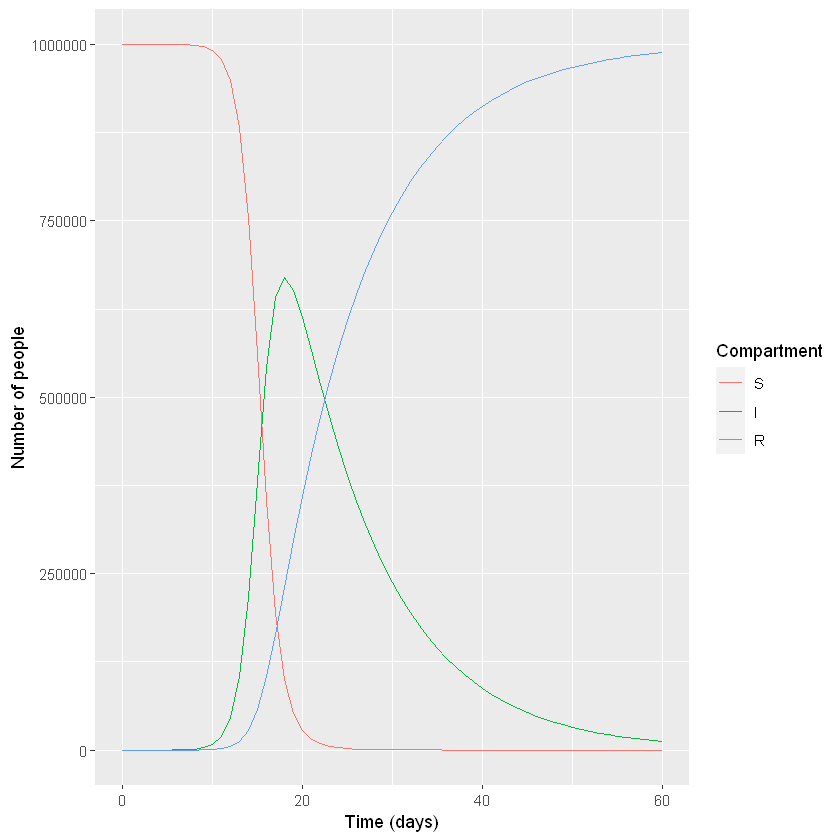

In [4]:
# Plotting the output
output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number of people") +                                             # add label for y axis
  labs(colour = "Compartment")            

In [5]:
output[output$time == 19,] #check peak day

,time,S,I,R
,<dbl>,<dbl>,<dbl>,<dbl>
20,19,51602.45,651979,296418.6
